In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#datas
length =[40,50,60,70]
weight =[10,20,30,18]

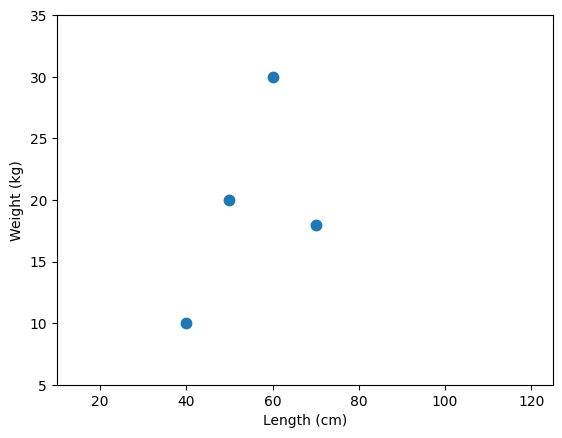

In [3]:
#plotting
fig , ax = plt.subplots ()
ax.plot(length, weight, '.', ms=15)
ax.set(xlabel='Length (cm)', ylabel='Weight (kg)',
       xlim=[10, 125], ylim=[5, 35]);

In [4]:
#fit linear to the data 
a, b = np.polyfit(length, weight, 1)

#predict the weight of a new observation (a new dog)
new_length = 62
pred_weight = a * new_length + b 
print('Predicted weight for a new data point, weight is {:1.2f}.'.format(pred_weight))


Predicted weight for a new data point, weight is 21.88.


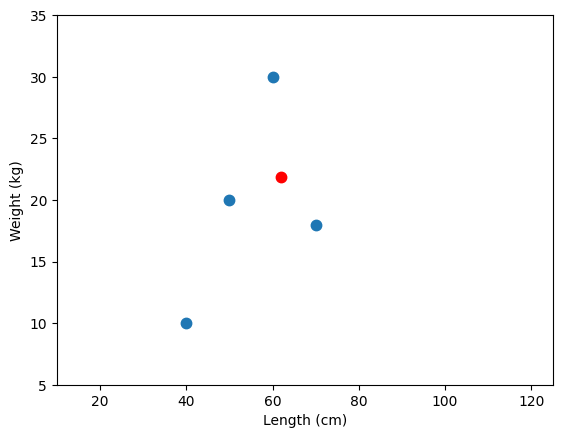

In [5]:
# We can check how our prediction fits in with the data we observed
ax.plot(new_length, pred_weight, '.r', ms=15)
fig

In [6]:
# If we also happen to now the true weight of our test data, we can check how good our prediction is
actual_weight = 14.7
error = actual_weight - pred_weight

print('The (absolute) error of our prediction is {:1.2f} kilograms.'.format(error))

The (absolute) error of our prediction is -7.18 kilograms.


Let’s now imagine our local zoologist is investigating a group of squirrels.

In [7]:
# We observe a bunch of squirrels with [height (cm), weight (grams)] pairs
data = np.array([[10., 600.], [16., 1200], [6., 800], [12., 700.], [17., 1400.],
                [8., 500.], [20., 1500.], [21., 1300.], [11., 800.], [18., 1100.]])

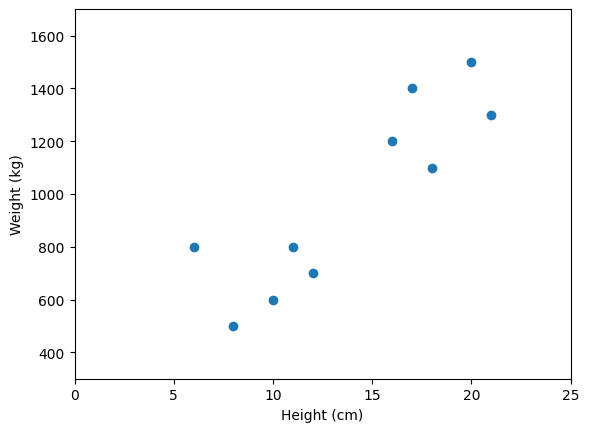

In [8]:
# Visualize our data!
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)',
       xlim=[0, 25], ylim=[300, 1700]);

In [9]:
# Use scikit-learn to import a classification algorithm
from sklearn.cluster import KMeans

In [10]:
# Apply K-means clustering
kmeans = KMeans(2).fit(data)

C:\Users\melik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# This gives us a label each data point, as to which cluster it belongs to
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [12]:
# We can use these to split our dataset up into putative groupings
cl_1 = data[kmeans.labels_ == 0]
cl_2 = data[kmeans.labels_ == 1]

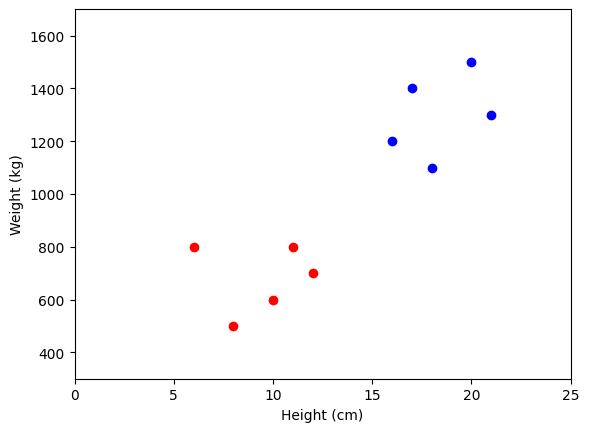

In [13]:
# And visualize the classification
fig, ax = plt.subplots()
ax.plot(cl_1[:, 0], cl_1[:, 1], '.b', ms=12)
ax.plot(cl_2[:, 0], cl_2[:, 1], '.r', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)',
       xlim=[0, 25], ylim=[300, 1700]);